In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

2022-10-10 16:34:28.156030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = 130

Already have data downloaded for Gaia ID 5602990927344688256.
If you want to check for new data, run `janet.update()`.


Running pixels in aperture: 100%|████████████| 300/300 [00:01<00:00, 193.36it/s]


### Running Simple Astropy Lomb-Scargle on Sector 33-34 on star 5602990927344688256 ###
### Completed Simple Astropy Lomb-Scargle for Sector 33-34 on star 5602990927344688256 ###
### Running Wavelet Estimation for Sector 33-34 on star 5602990927344688256 ###


100%|█████████████████████████████████████████| 156/156 [00:06<00:00, 23.08it/s]


### Completed Wavelet Estimation for Sector 33-34 on star 5602990927344688256 ###
### Running Composite ACF estimation for Sector 33-34 on star 5602990927344688256 ###
### Completed Composite ACF estimation for Sector 33-34 on star 5602990927344688256 ###
### Running ACF Estimation on star 5602990927344688256 ###
### Completed ACF Estimation for Sector 33-34 on star 5602990927344688256 ###


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


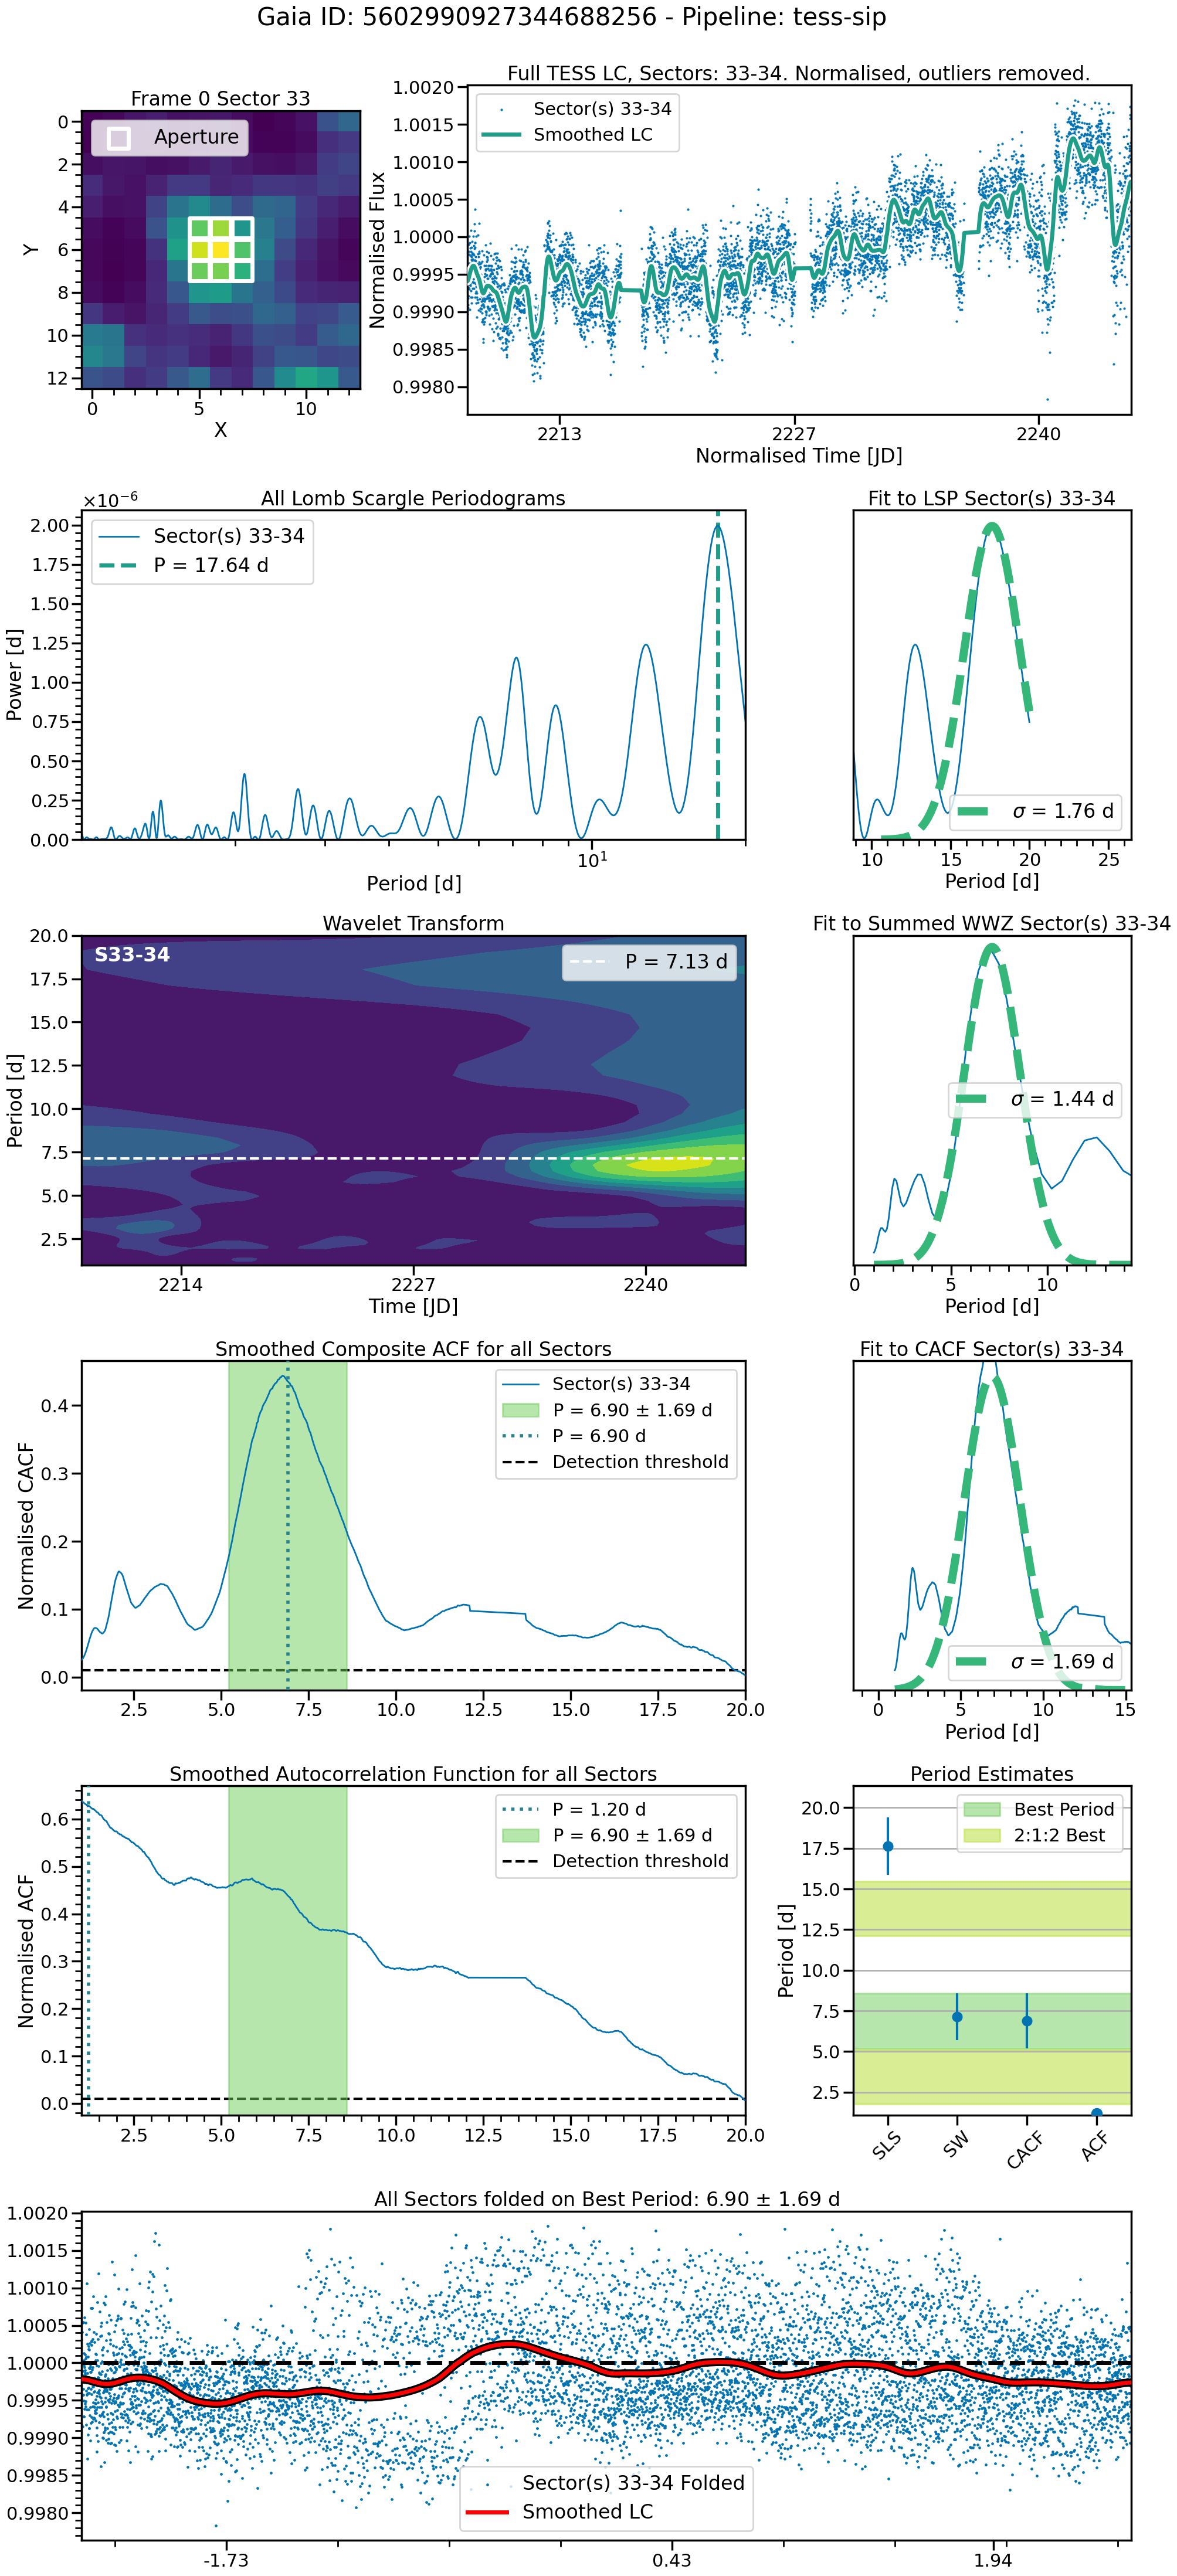

In [8]:
for method in ['tess-sip']:#'eleanor', 'eleanor-corner','eleanor-pca', 'unpopular','tess-sip']:
    j = janet.boot(uni, index=index, use_prior=False, pipeline = method)
    j.prepare_data()
    j.get_rotation(period_range=(1, 20))
    j.validate_rotation()
    j.view()
    plt.show()

Plot lightcurves

In [ ]:
sys.exit()

In [ ]:
ax = j.void['clc_33-34'].plot(label='eleanor')

pls = ['c','raw','pca','corn','r', 'cpm']
for pl in pls:
    j.void[f'{pl}lc_33-34'].plot(ax=ax, label=pl)
ax.legend(fontsize=10)

In [ ]:
ax = j.void['clc_16-17'].to_periodogram(maximum_period=27).plot(label='eleanor', view='period')

pls = ['c','raw','pca','corn','r', 'cpm']
for pl in pls:
    j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).plot(ax=ax, label=pl,view='period', scale='log')
    ax.axvline(j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).period_at_max_power.value)
    print(j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).period_at_max_power)
ax.legend(fontsize=10)